<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#subset-to-good-samples-+-LFS-+-Normal" data-toc-modified-id="subset-to-good-samples-+-LFS-+-Normal-5">subset to good samples + LFS + Normal</a></span></li><li><span><a href="#summary-for-text" data-toc-modified-id="summary-for-text-6">summary for text</a></span></li><li><span><a href="#Venn-diagram" data-toc-modified-id="Venn-diagram-7">Venn diagram</a></span></li><li><span><a href="#V-usage-vs-aa" data-toc-modified-id="V-usage-vs-aa-8">V usage vs aa</a></span></li><li><span><a href="#V-usage-PCA" data-toc-modified-id="V-usage-PCA-9">V usage PCA</a></span></li><li><span><a href="#CDR3-Length" data-toc-modified-id="CDR3-Length-10">CDR3 Length</a></span><ul class="toc-item"><li><span><a href="#PBMC" data-toc-modified-id="PBMC-10.1">PBMC</a></span></li><li><span><a href="#PBMC-vs-cfDNA" data-toc-modified-id="PBMC-vs-cfDNA-10.2">PBMC vs cfDNA</a></span></li><li><span><a href="#cfDNA" data-toc-modified-id="cfDNA-10.3">cfDNA</a></span></li></ul></li><li><span><a href="#V-Usage" data-toc-modified-id="V-Usage-11">V Usage</a></span></li><li><span><a href="#Diversity-vs-VJ" data-toc-modified-id="Diversity-vs-VJ-12">Diversity vs VJ</a></span></li></ul></div>

# Dependencies

In [1]:
pacman::p_load(ggplot2, immunarch, ggbeeswarm, factoextra, ggridges, randomcoloR, ggvenn)

# Functions

In [2]:
histp <- function(df, var){
    myp <- ggplot(data = df, aes(x = eval(parse(text = var)))) + 
    geom_histogram() + myplot + myaxis + labs(x = var)
    return(myp)
}

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

In [5]:
load(file = paste0(datapath, "capTCRseq/PBMC_GoodSamples.RData"))
load(file = paste0(datapath, "capTCRseq/cfDNA_GoodSamples.RData"))

In [6]:
load(file = paste0(datapath,"capTCRseq/divstats_immunarch.RData" ))

In [7]:
#contains all flow + seq data
dim(meta_div)

[1] 841  68

In [8]:
load(file = paste0(datapath, "capTCRseq/int_load_meta.RData"))

In [9]:
# contains flow + seq data for those samples we capTCR-seq'd.
dim(int_load$meta)

[1] 585  68

In [10]:
# these are repertoires with no productive clones
int_load$meta[ is.na(int_load$meta$TRB),]

Sample,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,⋯,q0_aa,q0_v,q0_j,q0_aav,q0_vj,q1_aa,q1_v,q1_j,q1_aav,q1_vj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_347-01-cfDNA,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,NA,⋯,2,2,2,2,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
CHP_366-05_cfDNA,CHP_366_05,CHP_366,X05,0.0,0.00,14,HD,0,NA,⋯,1,1,1,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
CHP_377-01-cfDNA,CHP_377_01,CHP_377,X01,0.9,277.95,18,HR ALL,0.9,NA,⋯,1,1,1,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
CHP_381-05_cfDNA,CHP_381_05,CHP_381,X05,0.0,81.03,6,EWS,0,NA,⋯,2,2,1,2,1.5,1.960132,1.960132,1.000000,1.960132,1.480066
CHP_391-02_cfDNA,CHP_391_02,CHP_391,X02,1.5,18.20,10,HR ALL,1.5,NA,⋯,1,1,1,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
CHP_392-01_cfDNA,CHP_392_01,CHP_392,X01,0.5,63.24,8,ALL,0.5,NA,⋯,1,1,1,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
CHP_398-01_cfDNA,CHP_398_01,CHP_398,X01,1.6,328.04,6,ALL,1.6,NA,⋯,2,2,2,2,2.0,1.649385,1.649385,1.649385,1.649385,1.649385
CHP_401-03_cfDNA,CHP_401_03,CHP_401,X03,8.7,396.03,3,ERMS,8.7,NA,⋯,1,1,1,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
CHP_419-FFPE-DNA_S2,CHP_419,CHP_419,X00,NA,NA,NA,OS,NA,NA,⋯,1,1,1,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#int_load1 <- repFilter(int_load, .method = "by.clonotype", .query = list(CDR3.aa = exclude("partial", "out_of_frame")))

# subset to good samples + LFS + Normal


In [12]:
LFS <- int_load$meta$Sample[ int_load$meta$Disease_type == "LFS"]
normals <- int_load$meta$Sample[ int_load$meta$Disease_type == "Normal"]

In [13]:
tumor <- int_load$meta$Sample[ int_load$meta$sampletype == "Tumor"]

In [14]:
int_load1 <- repFilter(int_load, .method = "by.meta", 
                       .query = list(Sample = include(subset_cfdna$basename, tumor,                      
                                                      subset_pbmc$basename, LFS, normals)))

# summary for text

In [15]:
length(int_load1$data)

[1] 520

In [16]:
length(unique(int_load1$meta$Patient))

[1] 120

In [17]:
table(int_load1$meta$cancergroup)


Leukemia      LFS Lymphoma   Normal    Solid 
     239       10       94       14      163 

In [18]:
length(LFS)

[1] 10

In [19]:
length(normals)

[1] 14

In [20]:
mytab <- as.data.frame(table(int_load1$meta$Patient, 
                             int_load1$meta$Disease_type))

mytab <- mytab[ mytab$Freq > 0, ]

table(mytab$Var2)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     1     21      9      1      4      2      3      2      3      6      3 
    HD HR ALL    LFS  MS NB     NB Normal     OS  PMBCL SR ALL  T-ALL  WILMS 
     6     13     10      1      3     14      9      1      3      4      1 

In [21]:
mytab <- as.data.frame(table(int_load1$meta$Patient, 
                             int_load1$meta$cancergroup))

mytab <- mytab[ mytab$Freq > 0, ]

table(mytab$Var2)


Leukemia      LFS Lymphoma   Normal    Solid 
      53       10       15       14       37 

In [22]:
mytab <- as.data.frame(table(int_load1$meta$sampletype, int_load1$meta$Group))

In [23]:
table(int_load1$meta$sampletype, useNA = "always")


cfDNA  PBMC Tumor  <NA> 
  254   248    18     0 

In [24]:
dim(int_load1$meta)

[1] 520  68

In [25]:
table(int_load1$meta$Disease_type[ int_load1$meta$sampletype == "Tumor"])


 ALCL    BL   BLL DLBCL  ERMS    HD    NB    OS PMBCL 
    1     2     1     1     4     4     1     3     1 

In [26]:
mytab

Var1,Var2,Freq
<fct>,<fct>,<int>
cfDNA,CHP,254
PBMC,CHP,238
Tumor,CHP,18
cfDNA,LFS,0
PBMC,LFS,10
Tumor,LFS,0


In [27]:
tmp <- int_load1$meta[ int_load1$meta$sampletype == "PBMC",]

mytab <- as.data.frame(table(tmp$Patient, 
                             tmp$SCM., useNA = "always"),
                      stringsAsFactors = F)
mytab <- mytab[ mytab$Freq > 0, ]
mytab <- mytab[!is.na(mytab$Var2),]

mytab

,Var1,Var2,Freq
,<chr>,<chr>,<int>
26,CHP_347,0,1
79,CHP_402,0,1
171,CHP_385,0.016307893,1
255,CHP_355,0.037188546,1
429,CHP_419,0.0486618,1
513,CHP_394,0.091157703,1
580,CHP_346,0.156985871,1
737,CHP_397,0.231481481,1
803,CHP_347,0.32183908,1


# Venn diagram

In [64]:
#get sample_ids for those PBMCs with flow data
tmp <- int_load1$meta[ int_load1$meta$sampletype == "PBMC",]
flowsamples <- tmp$sample_id[ !is.na(tmp$EM)]

In [65]:
#get sample_ids for those PBMCs with ex vivo data
tmp <- int_load1$meta[ int_load1$meta$sampletype == "PBMC",]
exvivosamples <- tmp$sample_id[ which(tmp$FOLD > 0)]

In [66]:
#get sample_ids for those PBMCs with tcr data
tmp <- int_load1$meta[ int_load1$meta$sampletype == "PBMC",]
pbcmtcrsamples <- tmp$sample_id

In [67]:
#get sample_ids for those PBMCs with tcr data
tmp <- int_load1$meta[ int_load1$meta$sampletype == "cfDNA",]
cfDNAtcrsamples <- tmp$sample_id

In [68]:
x <- list(
  `capTCR-seq (cfDNA)` = cfDNAtcrsamples, 
  `capTCR-seq (PBMC)` = pbcmtcrsamples,
  `Flow cytometry` = flowsamples,
  `Ex vivo T-cell expansion` = exvivosamples)

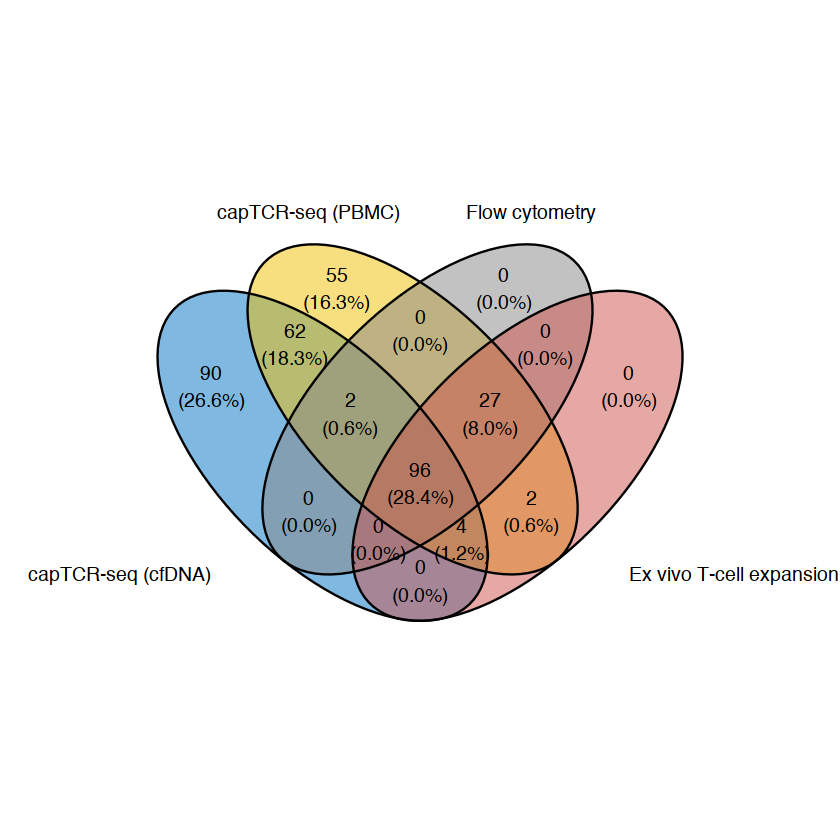

In [97]:
ggvenn(x, 
fill_color = c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF"),
stroke_size = 0.5, set_name_size = 4) + scale_y_continuous(expand = c(0.3,0)) +
scale_x_continuous(expand = c(0.3,0))

In [98]:
pdf(paste0(plotpath, "venn_int.pdf"),
    width = 10, height = 10)
ggvenn(x, 
fill_color = c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF"),
stroke_size = 0.5, set_name_size = 4) + scale_y_continuous(expand = c(0.3,0)) +
scale_x_continuous(expand = c(0.3,0))
dev.off()

pdf 
  2

# V usage vs aa

In [15]:
length(int_load1$data)

[1] 520

In [50]:
allmeta <- int_load1$meta

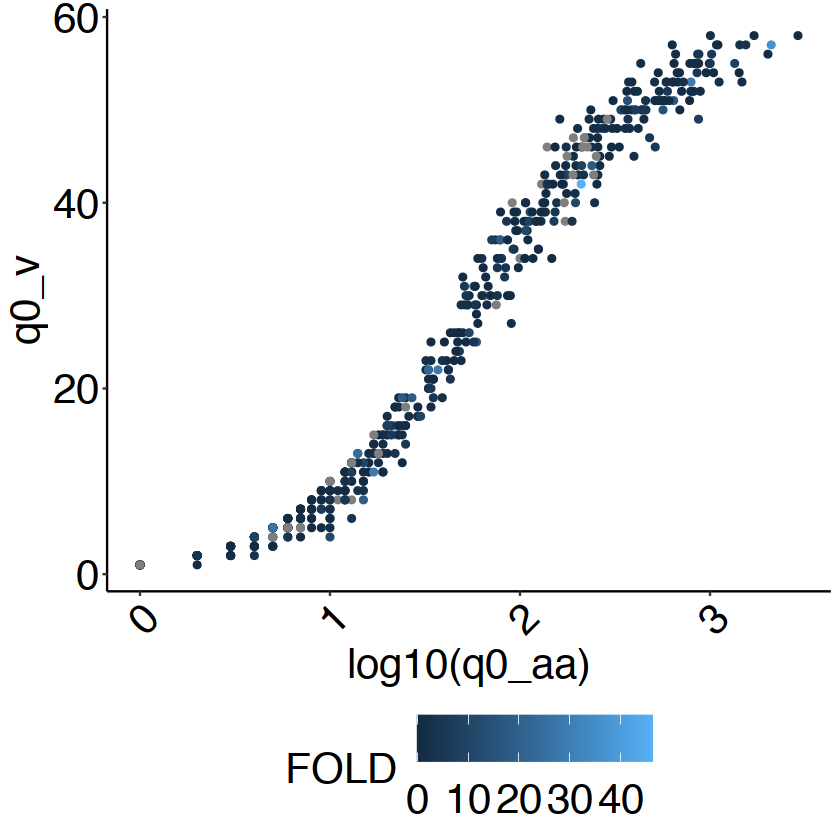

In [69]:
ggplot(data = allmeta, 
       aes( x = log10(q0_aa), y = q0_v, color = FOLD) ) + geom_point() + 
myplot + myaxis + theme(legend.position = "bottom")# + coord_cartesian( x = c(0,500))

In [85]:
pairwise.t.test((allmeta$q0_aa), allmeta$cancergroup, "none")


	Pairwise comparisons using t tests with pooled SD 

data:  (allmeta$q0_aa) and allmeta$cycle 

    X00   X01   X02   X03   X04  
X01 0.164 -     -     -     -    
X02 0.021 0.259 -     -     -    
X03 0.079 0.658 0.484 -     -    
X04 0.043 0.416 0.794 0.689 -    
X05 0.089 0.665 0.529 0.984 0.722

P value adjustment method: none 

In [16]:
int_vu <- as.data.frame(geneUsage(int_load1$data, c("hs.trbv"), .norm = T, .quant = "count"))

In [17]:
rownames(int_vu) <- int_vu$Names
int_vu$Names <- NULL

In [18]:
int_ju <- as.data.frame(geneUsage(int_load1$data, "HomoSapiens.TRBJ", .norm = T, .quant = "count"))

In [19]:
rownames(int_ju) <- int_ju$Names
int_ju$Names <- NULL

In [20]:
myint_vu <- as.data.frame(t(int_vu))

In [21]:
myint <- cbind(myint_vu, as.data.frame(t(int_ju)[rownames(myint_vu),]))

In [22]:
myint$`TRBJ2-2P` <- NULL

In [23]:
myint[is.na(myint)] <- 0

In [24]:
library(Rtsne)

In [25]:
myint <- as.matrix(myint)

In [37]:
dups <- rownames(myint)[ duplicated(myint)]

In [38]:
tsne_out <- Rtsne(myint[! duplicated(myint),])

In [39]:
tsne_df <- as.data.frame(tsne_out$Y)

In [40]:
tsne_df_meta <- cbind(tsne_df, int_load1$meta[! int_load1$meta$Sample %in% dups,])

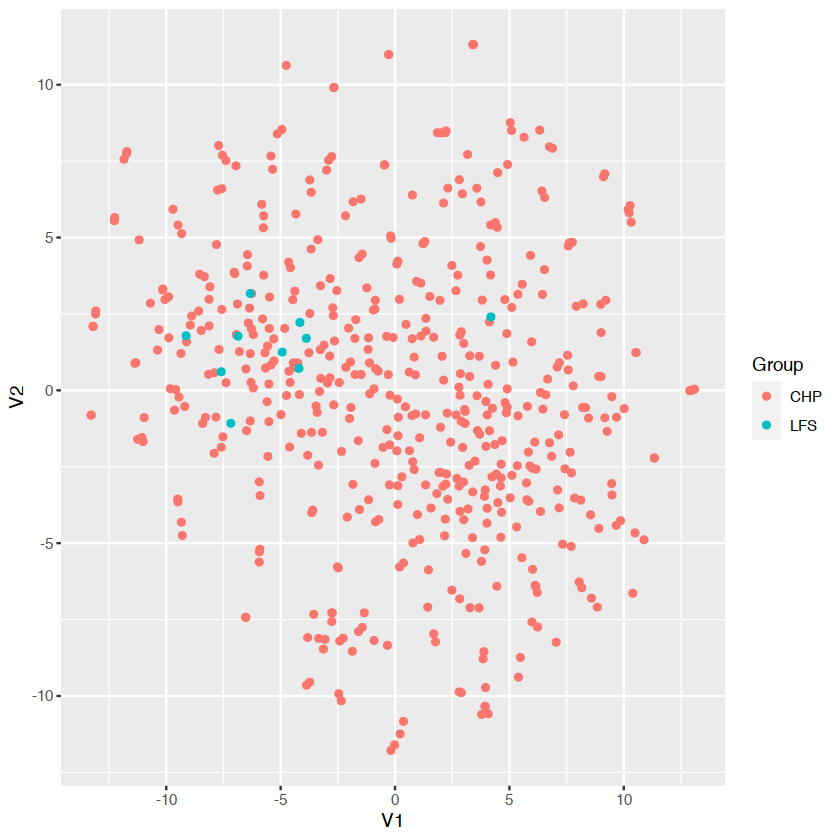

In [49]:
ggplot(data = tsne_df_meta,aes(x = V1, y = V2,color = Group))+
  geom_point()

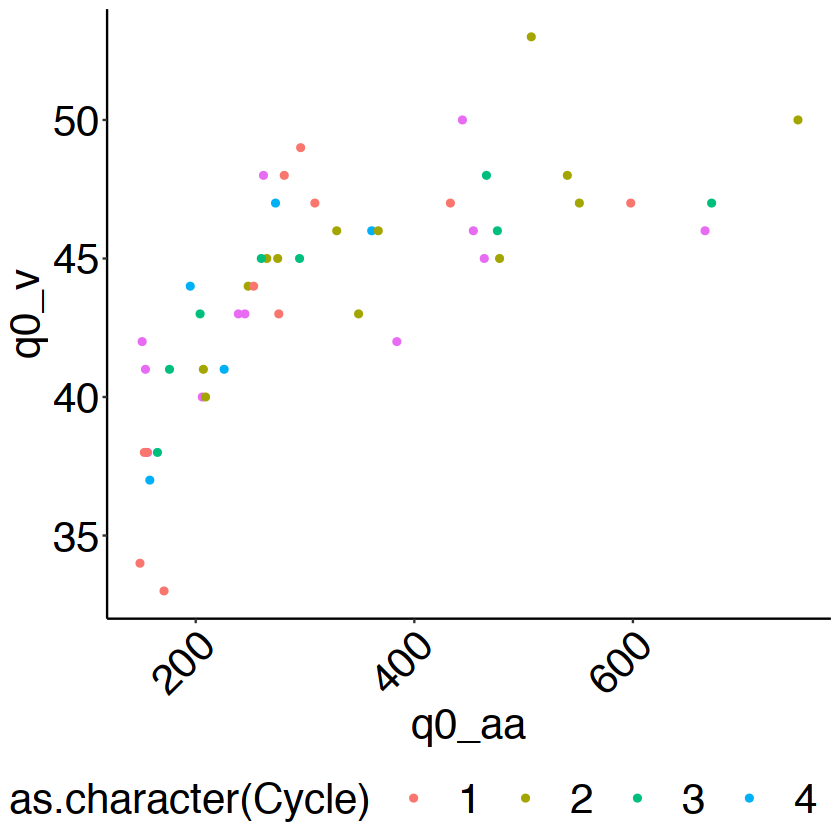

In [113]:
divstats$Disease_type <- metadata$Disease_type[ match(divstats$sample_id,metadata$sample_id)]
divstats$cancergroup <- metadata$group[ match(divstats$sample_id,metadata$sample_id)]

In [115]:
pbmc <- divstats[ divstats$Sample == "PBMC",]
pbmc <- pbmc[ pbmc$Cycle %in% c(0,1),]

In [116]:
pbmc$sample_id

[1] "CHP_350_01"      "CHP_354_01"      "CHP_366_01"      "CHP_367_01"     
 [5] "CHP_372_01"      "CHP_375_01"      "CHP_346_01"      "CHP_349_01"     
 [9] "CHP_351_01"      "CHP_352_01"      "CHP_358_01"      "CHP_404_01"     
[13] "CHP_405_01"      "CHP_409_01"      "CHP_411_01"      "CHP_415_01"     
[17] "CHP_416_01"      "CHP_418_01"      "CHP_422_01"      "CHP_348_01"     
[21] "LFS_TCR_4535_00" "LFS_TCR_4570_00" "LFS_TCR_4602_00" "LFS_TCR_4758_00"
[25] "LFS_TCR_4759_00" "LFS_TCR_4783_00" "LFS_TCR_4837_00" "LFS_TCR_4838_00"
[29] "LFS_TCR_5014_00" "LFS_TCR_5067_00" "CHP_373_01"      "CHP_378_01"     
[33] "CHP_347_01"      "CHP_355_01"      "CHP_357_01"      "CHP_361_01"     
[37] "CHP_364_01"      "CHP_353_01"      "CHP_359_01"      "CHP_362_01"     
[41] "CHP_368_01"      "CHP_370_01"      "CHP_387_01"      "CHP_396_01"     
[45] "CHP_397_01"      "CHP_399_01"      "CHP_10YO_M_00"   "CHP_11YO_M_00"  
[49] "CHP_15YO_F_A_00" "CHP_15YO_F_B_00" "CHP_15YO_M_00"   "CHP_16YO_M_00"  
[53] "CHP_1YO_M_A_00"  "CHP_1YO_M_B_00"  "CHP_2YO_M_00"    "CHP_3YO_F_00"   
[57] "CHP_3YO_M_A_00"  "CHP_3YO_M_B_00"  "CHP_5YO_M_00"    "CHP_8MO_F_00"   
[61] "CHP_377_01"      "CHP_401_01"      "CHP_363_01"      "CHP_365_01"     
[65] "CHP_371_01"      "CHP_381_01"      "CHP_414_01"      "CHP_420_01"     
[69] "CHP_369_01"

In [118]:
# add lfs remove normal
pbmc$Disease_type[grepl("LFS", pbmc$sample_id)] <- "LFS"

pbmc <- pbmc[!grepl("YO", pbmc$sample_id),]
pbmc <- pbmc[!grepl("MO", pbmc$sample_id),]

In [124]:
myorder <- sort(tapply(pbmc$q1_vj, pbmc$Disease_type, median))

In [125]:
myorder

T-ALL     WILMS      ALCL        HB       CML        BL    HR ALL        NB 
 4.582472  7.771891  8.372553 11.241965 11.652155 11.893585 12.619961 14.685184 
       OS       LFS        HD       AML       ALL      ERMS      ARMS       EWS 
16.681415 17.315790 17.338981 18.090124 19.455056 20.030255 20.491174 20.641408

# V usage PCA

In [17]:
int_gu <- as.data.frame(geneUsage(int_load1$data, "hs.trbv", .norm = T, .quant = "count"))

In [18]:
rownames(int_gu) <- int_gu$Names
int_gu$Names <- NULL
int_gu[is.na(int_gu)] <- 0
res.pca <- prcomp(t(int_gu), scale. = TRUE, center = TRUE)
p1 <- fviz_eig(res.pca)

In [19]:
p2 <- fviz_pca_var(res.pca, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [39]:
groups <- as.factor(int_load1$meta$cancergroup)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p3 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 3,alpha = 1,
                       col.ind = groups, axes = c(1, 5),
                       addEllipses = F, ellipse.alpha = 0, invisible="quali") +
scale_color_manual( values = myColors)

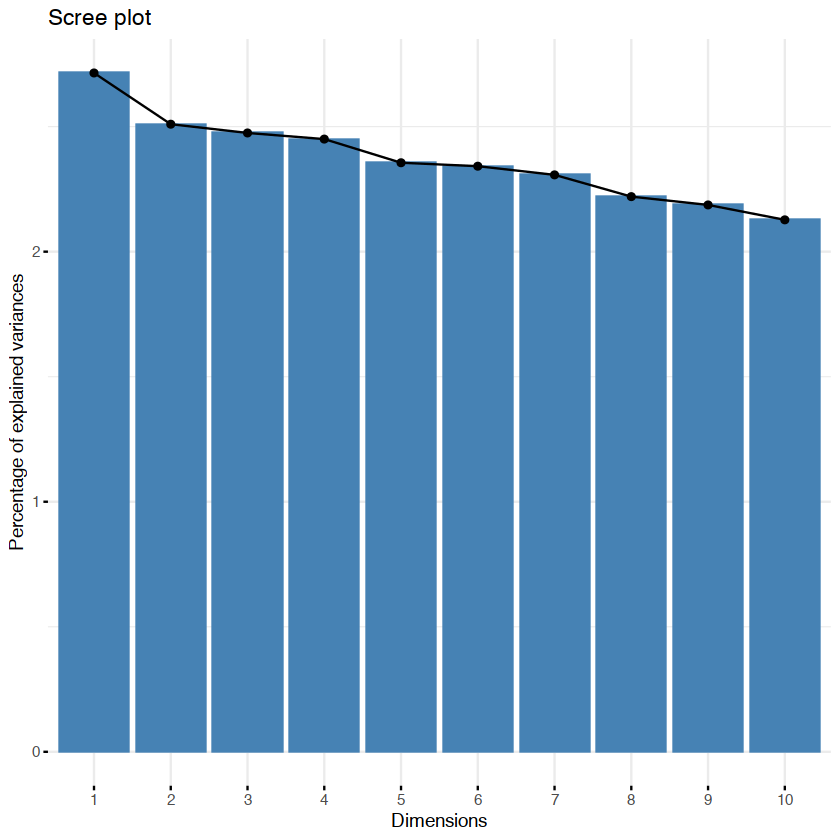

In [41]:
p1

In [42]:
res.ind <- get_pca_ind(res.pca)

In [46]:
res.ind$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,⋯,Dim.54,Dim.55,Dim.56,Dim.57,Dim.58,Dim.59,Dim.60,Dim.61,Dim.62,Dim.63
CHP_10YO-M_PBMC_DNA,4.165504e-02,3.030032e-02,1.578541e-01,1.233069e-01,8.404504e-02,3.286623e-04,1.579145e-02,2.791863e-03,0.0086148416,7.869709e-03,⋯,1.557372e-03,1.456196e-02,0.0093081856,1.416174e-03,2.264299e-03,3.271170e-03,5.921914e-04,1.424821e-02,9.661074e-03,1.811837e-33
CHP_11YO-M_PBMC_DNA,2.886100e-02,3.436509e-02,3.556672e-02,4.767638e-04,3.199735e-02,3.696793e-02,7.908486e-03,1.543746e-02,0.0004709235,5.626489e-03,⋯,8.818739e-03,1.771270e-03,0.0086345731,3.309765e-03,1.510045e-06,1.063778e-02,3.621867e-03,3.560555e-03,1.583339e-03,4.656391e-32
CHP_15YO-F-A_PBMC_DNA,5.553516e-02,1.219548e-02,5.072354e-03,4.650060e-02,3.801014e-02,6.052478e-02,6.433072e-04,1.169265e-02,0.0006448897,9.890600e-02,⋯,6.115368e-03,6.972939e-04,0.0068517829,4.448523e-04,1.055850e-02,5.735165e-03,7.255728e-02,9.832921e-02,5.563181e-03,5.222902e-32
CHP_15YO-F-B_PBMC_DNA,8.941879e-03,4.624093e-02,1.007940e-02,3.459153e-02,3.106562e-02,4.180254e-03,3.365289e-04,9.863678e-02,0.0223253198,1.881446e-04,⋯,2.734203e-03,9.754743e-04,0.0068669073,1.089773e-02,1.520831e-03,5.256660e-03,5.391098e-03,1.291279e-03,1.478988e-02,1.392825e-31
CHP_15YO-M_PBMC_DNA,2.648061e-02,1.889645e-03,2.215288e-02,8.746480e-03,9.247690e-03,2.377383e-02,5.456239e-05,9.984873e-03,0.0260230792,1.460133e-02,⋯,5.619070e-03,2.412297e-02,0.0781741095,2.892093e-03,1.577634e-02,5.463881e-03,2.656974e-03,5.384376e-04,2.423359e-03,4.514530e-31
CHP_16YO-M_PBMC_DNA,7.526675e-02,9.126529e-02,6.167191e-03,9.379281e-02,5.225381e-04,2.603662e-02,1.086666e-02,8.390836e-03,0.0018617927,1.784867e-04,⋯,1.921032e-05,7.756273e-03,0.0009576169,2.013811e-02,6.394422e-03,1.291968e-03,2.028115e-04,4.993480e-04,1.524346e-01,1.740519e-32
CHP_1YO-M-A_PBMC_DNA,7.741565e-03,1.438582e-04,5.849866e-02,4.919991e-02,4.939597e-03,2.468638e-05,3.789890e-04,2.151228e-03,0.0276708090,2.233773e-02,⋯,5.965327e-05,1.097936e-02,0.0247911569,9.359578e-05,4.910634e-02,4.231465e-02,4.577265e-03,4.523178e-03,5.934743e-03,5.262765e-32
CHP_1YO-M-B_PBMC_DNA,1.605631e-02,7.217059e-02,5.676119e-03,7.367633e-03,1.110727e-02,1.590659e-02,5.227808e-05,1.070320e-04,0.0248313048,1.531038e-03,⋯,2.668626e-03,1.751728e-03,0.0014001695,3.542361e-02,3.447918e-03,5.132672e-06,3.886757e-03,7.273677e-05,1.685113e-03,1.841651e-34
CHP_2YO-M_PBMC_DNA,3.436570e-02,6.238797e-05,1.704510e-02,1.825248e-02,7.690698e-03,5.074576e-02,1.791187e-04,9.424644e-05,0.0687054462,1.555980e-02,⋯,5.497505e-03,4.354283e-04,0.0433947583,2.941545e-06,1.366636e-03,3.305154e-02,2.976514e-05,2.446420e-02,7.807373e-03,4.014458e-35
CHP_323-03_cfDNA,1.711603e-05,4.230218e-02,4.644521e-02,2.919559e-03,2.497532e-02,5.157346e-02,3.773993e-04,5.804882e-03,0.0045461920,1.271763e-02,⋯,5.847692e-04,2.421720e-02,0.0072058316,2.422692e-02,3.480456e-03,1.108896e-03,5.433485e-02,1.148420e-02,3.172535e-02,4.599145e-32


# CDR3 Length

## PBMC

In [10]:
load(file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

In [11]:
pbmc <- repFilter(int_load, .method = "by.meta", .query = list(sample_type = include("PBMC")))

In [12]:
pbmc <- repFilter(pbmc, .method = "by.meta", .query = list(group = exclude(NA)))

In [13]:
summary(pbmc$meta$TRB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    56.0   138.0   256.7   367.0  2237.0 

In [14]:
pbmc1 <- repFilter(pbmc, .method = "by.clonotype", .query = list(CDR3.aa = exclude("partial", "out_of_frame")))

In [15]:
exp_len <- repExplore(pbmc1$data, .method = "len", .col = "aa", .coding = TRUE)

In [16]:
head(exp_len)

,Sample,Length,Count
,<chr>,<dbl>,<int>
1,CHP_323-03-PBMC-DNA,11,1
2,CHP_323-03-PBMC-DNA,12,3
3,CHP_323-03-PBMC-DNA,13,6
4,CHP_323-03-PBMC-DNA,14,14
5,CHP_323-03-PBMC-DNA,15,11
6,CHP_323-03-PBMC-DNA,16,5


In [17]:
exp_len1 <- cbind(exp_len, pbmc1$meta[ match(exp_len$Sample, pbmc1$meta$Sample),c("Disease_type", "Cycle", "group")])

In [18]:
summary(exp_len1$Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   13.00   16.00   22.25   20.00  113.00 

In [19]:
exp_len1$Length <- as.character(exp_len1$Length)
exp_len1$Cycle <- as.character(exp_len1$Cycle)

In [20]:
plot_ridge.fx <- function(mydf, var, myy){  
  ridgeline.plot <- ggplot() +
    geom_density_ridges(data = mydf, aes(x = eval(parse(text = var)), 
                                         y = eval(parse(text = myy)), 
                                         fill = eval(parse(text = myy))), scale = 2) + 
    myplot +
    theme(axis.line = element_line(color = "black"),
          axis.text = element_text(size = 30, color = "black"),
          axis.title = element_blank(), 
          plot.title = element_text(size = 30, hjust = 0.5),
          legend.position = "none") + #coord_flip() + #flip axes
    scale_y_discrete(expand = c(0.1,0))
  
  return(ridgeline.plot) 
}

Picking joint bandwidth of 2.53



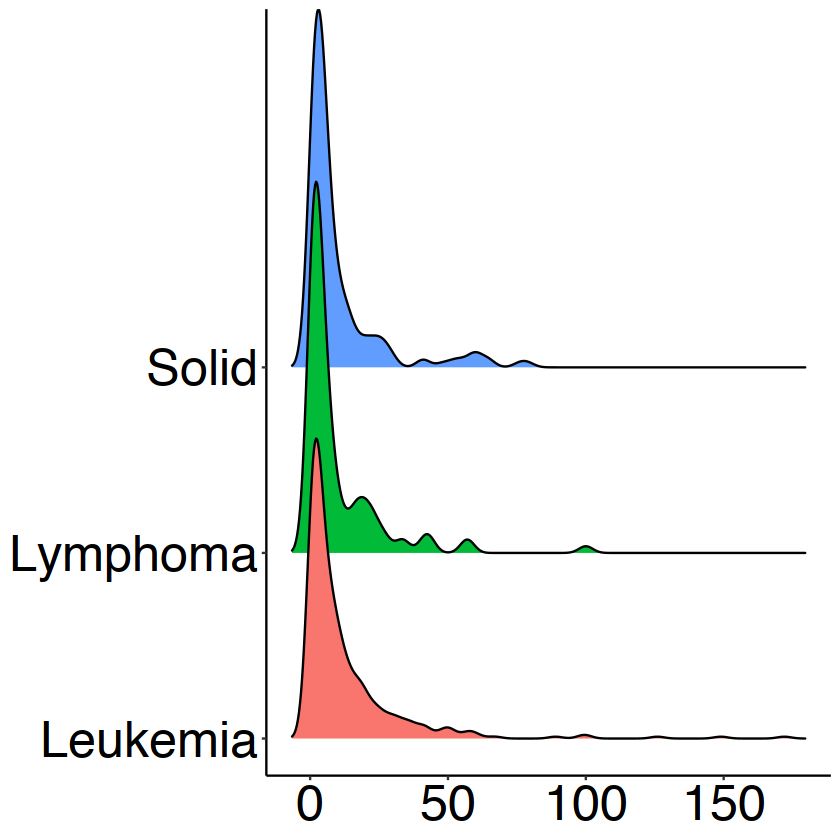

In [22]:
plot_ridge.fx(exp_len1[ exp_len1$Length < 13,], "Count", "group")

No significatn difference in CDR3 length among groups of PBMCs

## PBMC vs cfDNA

In [86]:
int_load_c <- repFilter(int_load, .method = "by.meta", .query = list(q0_v = exclude(NA), group = exclude(NA)))

In [87]:
exp_len <- repExplore(int_load_c$data, .method = "len", .col = "aa", .coding = TRUE)

In [124]:
exp_len1 <- cbind(exp_len, int_load_c$meta[ match(exp_len$Sample, int_load_c$meta$Sample),c("Disease_type", "Cycle", "group", "sample_type")])

In [125]:
summary(exp_len1$Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   13.00   15.00   20.37   18.00  113.00 

In [126]:
exp_len1$Length <- as.numeric(exp_len1$Length)

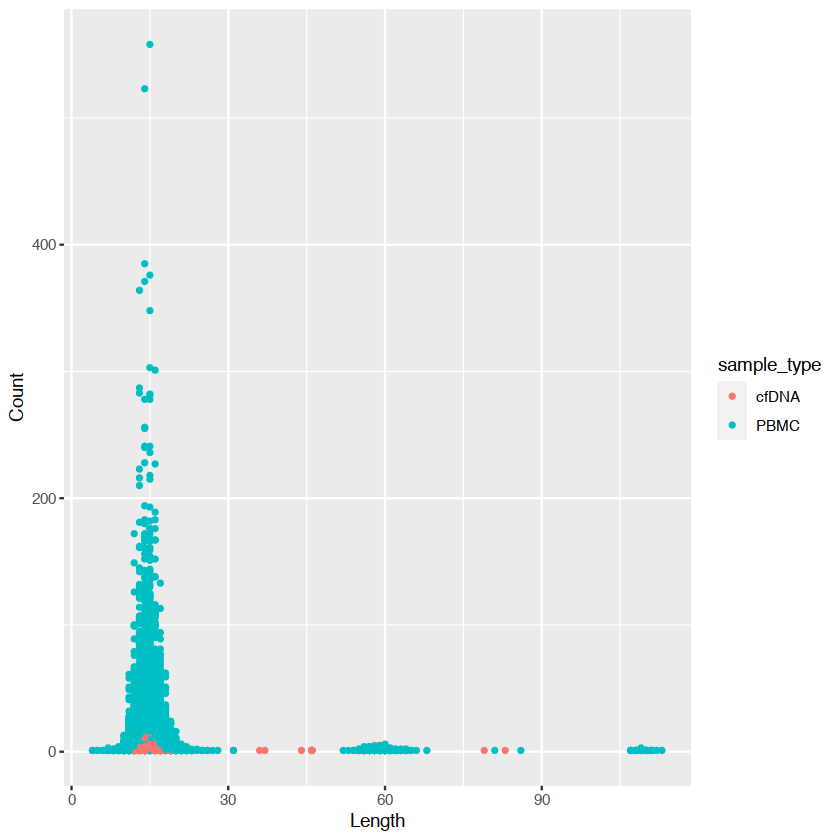

In [127]:
ggplot(exp_len1, aes(x = Length, y = Count, color = sample_type)) + geom_point(size = 1)

In [128]:
exp_len1$Length[ exp_len1$Length >= 21] <-  21

exp_len1$Length[ exp_len1$Length <= 12] <-  12

In [129]:
exp_len1$Length <- as.character(exp_len1$Length)

In [130]:
head(exp_len1)

,Sample,Length,Count,Disease_type,Cycle,group,sample_type
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,CHP_323-03_cfDNA,12,1,HR ALL,3,Leukemia,cfDNA
2,CHP_323-03_cfDNA,12,8,HR ALL,3,Leukemia,cfDNA
3,CHP_323-03_cfDNA,12,9,HR ALL,3,Leukemia,cfDNA
4,CHP_323-03_cfDNA,13,18,HR ALL,3,Leukemia,cfDNA
5,CHP_323-03_cfDNA,14,10,HR ALL,3,Leukemia,cfDNA
6,CHP_323-03_cfDNA,15,28,HR ALL,3,Leukemia,cfDNA


In [131]:
length_mat <- tidyr::spread(Length, Count, data = exp_len1)

ERROR: [1m[33mError[39m in [1m[1m`tidyr::spread()`:[22m
[33m![39m Each row of output must be identified by a unique combination of keys.
Keys are shared for 1410 rows:
* 1, 2, 3
* 12, 13
* 21, 22
* 35, 36, 37
* 48, 49, 50
* 60, 61
* 76, 77
* 86, 87, 88
* 97, 98
* 114, 115
* 131, 132
* 138, 139
* 145, 146
* 156, 157
* 163, 164
* 187, 188, 189, 190
* 202, 203
* 208, 209
* 232, 233, 234
* 250, 251, 252
* 263, 264, 265
* 280, 281, 282
* 287, 288, 289
* 301, 302
* 314, 315
* 321, 322
* 325, 326
* 342, 343, 344
* 355, 356, 357
* 371, 372
* 378, 379
* 383, 384
* 406, 407
* 417, 418
* 427, 428
* 435, 436
* 467, 468, 469
* 481, 482, 483
* 494, 495
* 505, 506, 507
* 512, 513, 514, 515
* 526, 527, 528, 529
* 539, 540
* 549, 550
* 563, 564, 565
* 572, 573, 574
* 581, 582
* 596, 597
* 609, 610, 611, 612
* 625, 626
* 636, 637
* 642, 643, 644
* 655, 656
* 667, 668
* 682, 683
* 698, 699
* 713, 714, 715
* 730, 731
* 737, 738
* 747, 748
* 757, 758, 759
* 765, 766, 767, 768, 769
* 780, 781
* 788, 789
* 800, 801, 802
* 812, 813
* 824, 825
* 840, 841
* 853, 854
* 860, 861
* 873, 874, 875, 876
* 895, 896
* 901, 902, 903
* 912, 913
* 919, 920
* 928, 929
* 954, 955
* 967, 968, 969
* 986, 987
* 994, 995, 996
* 1008, 1009
* 1015, 1016, 1017, 1018, 1019
* 1035, 1036
* 1045, 1046
* 1061, 1062
* 1066, 1067, 1068
* 1080, 1081
* 1093, 1094
* 1099, 1100
* 1112, 1113
* 1119, 1120, 1121
* 1141, 1142, 1143
* 1157, 1158
* 1173, 1174, 1175, 1176
* 1191, 1192, 1193
* 1199, 1200, 1201, 1202, 1203, 1204
* 1229, 1230, 1231
* 1244, 1245, 1246
* 1257, 1258, 1259
* 1274, 1275, 1276
* 1287, 1288, 1289, 1290
* 1296, 1297, 1298
* 1313, 1314
* 1322, 1323, 1324
* 1344, 1345
* 1359, 1360, 1361
* 1408, 1409, 1410
* 1425, 1426, 1427
* 1446, 1447, 1448
* 1463, 1464, 1465, 1466
* 1487, 1488
* 1501, 1502
* 1511, 1512, 1513
* 1527, 1528
* 1543, 1544, 1545
* 1554, 1555, 1556, 1557, 1558, 1559
* 1573, 1574
* 1582, 1583
* 1595, 1596, 1597
* 1607, 1608, 1609, 1610, 1611
* 1635, 1636, 1637
* 1652, 1653
* 1673, 1674, 1675
* 1690, 1691
* 1703, 1704
* 1712, 1713, 1714
* 1729, 1730, 1731
* 1747, 1748, 1749, 1750
* 1761, 1762
* 1773, 1774, 1775
* 1791, 1792
* 1799, 1800
* 1814, 1815, 1816, 1817
* 1834, 1835
* 1844, 1845, 1846, 1847
* 1858, 1859
* 1868, 1869
* 1888, 1889, 1890
* 1908, 1909, 1910, 1911
* 1926, 1927, 1928
* 1942, 1943, 1944, 1945
* 1961, 1962, 1963, 1964, 1965
* 1988, 1989
* 2001, 2002
* 2007, 2008, 2009
* 2018, 2019, 2020, 2021
* 2039, 2040
* 2050, 2051, 2052
* 2063, 2064
* 2081, 2082, 2083
* 2096, 2097
* 2111, 2112
* 2120, 2121
* 2147, 2148, 2149, 2150
* 2165, 2166, 2167
* 2184, 2185, 2186
* 2204, 2205, 2206
* 2215, 2216, 2217
* 2237, 2238, 2239
* 2255, 2256
* 2272, 2273, 2274
* 2289, 2290
* 2296, 2297
* 2307, 2308, 2309
* 2318, 2319, 2320, 2321
* 2335, 2336
* 2350, 2351, 2352
* 2367, 2368, 2369
* 2397, 2398
* 2413, 2414
* 2423, 2424, 2425
* 2434, 2435, 2436, 2437, 2438
* 2458, 2459
* 2466, 2467, 2468
* 2485, 2486, 2487
* 2521, 2522
* 2533, 2534
* 2543, 2544, 2545
* 2558, 2559
* 2561, 2562, 2563, 2564
* 2587, 2588, 2589
* 2597, 2598
* 2604, 2605
* 2612, 2613, 2614, 2615, 2616
* 2642, 2643
* 2652, 2653
* 2661, 2662, 2663
* 2690, 2691, 2692, 2693
* 2701, 2702
* 2706, 2707, 2708, 2709
* 2724, 2725, 2726
* 2734, 2735
* 2748, 2749
* 2755, 2756
* 2770, 2771
* 2776, 2777
* 2789, 2790, 2791
* 2814, 2815, 2816
* 2838, 2839, 2840, 2841
* 2850, 2851, 2852
* 2863, 2864, 2865, 2866
* 2892, 2893, 2894
* 2908, 2909, 2910
* 2922, 2923, 2924
* 2930, 2931, 2932
* 2955, 2956
* 2982, 2983, 2984, 2985, 2986
* 3000, 3001
* 3009, 3010, 3011, 3012
* 3035, 3036, 3037, 3038
* 3059, 3060, 3061, 3062, 3063
* 3083, 3084, 3085
* 3097, 3098, 3099
* 3115, 3116, 3117
* 3136, 3137, 3138
* 3154, 3155, 3156, 3157
* 3185, 3186
* 3199, 3200, 3201, 3202
* 3222, 3223
* 3230, 3231
* 3236, 3237, 3238, 3239
* 3256, 3257, 3258
* 3280, 3281
* 3301, 3302, 3303
* 3334, 3335
* 3349, 3350
* 3361, 3362
* 3368, 3369
* 3381, 3382
* 3398, 3399, 3400
* 3413, 3414, 3415, 3416, 3417
* 3435, 3436, 3437
* 3452, 3453
* 3468, 3469
* 3486, 3487
* 3500, 3501, 3502
* 3509, 3510, 3511
* 3519, 3520, 3521, 3522
* 3538, 3539
* 3543, 3544
* 3555, 3556
* 3563, 3564, 3565
* 3587, 3588
* 3598, 3599, 3600
* 3613, 3614
* 3619, 3620, 3621
* 3629, 3630
* 3657, 3658
* 3672, 3673, 3674, 3675, 3676
* 3693, 3694
* 3699, 3700
* 3704, 3705
* 3714, 3715
* 3721, 3722, 3723
* 3737, 3738, 3739
* 3772, 3773
* 3784, 3785, 3786
* 3793, 3794, 3795, 3796, 3797
* 3815, 3816
* 3830, 3831, 3832, 3833
* 3846, 3847
* 3855, 3856, 3857
* 3869, 3870
* 3882, 3883
* 3891, 3892, 3893, 3894
* 3906, 3907, 3908
* 3922, 3923, 3924
* 3936, 3937, 3938
* 3956, 3957
* 3967, 3968, 3969
* 3990, 3991, 3992
* 4009, 4010, 4011
* 4047, 4048, 4049, 4050
* 4065, 4066
* 4073, 4074, 4075
* 4089, 4090
* 4105, 4106
* 4118, 4119
* 4138, 4139, 4140
* 4158, 4159, 4160, 4161
* 4174, 4175, 4176, 4177
* 4188, 4189
* 4200, 4201, 4202
* 4212, 4213, 4214, 4215
* 4233, 4234, 4235, 4236, 4237
* 4251, 4252, 4253
* 4268, 4269, 4270, 4271, 4272
* 4285, 4286, 4287, 4288, 4289
* 4303, 4304, 4305
* 4317, 4318, 4319
* 4330, 4331, 4332
* 4342, 4343, 4344, 4345
* 4358, 4359, 4360
* 4374, 4375, 4376, 4377, 4378
* 4393, 4394, 4395
* 4403, 4404, 4405
* 58, 59
* 68, 69, 70
* 172, 173
* 199, 200, 201
* 243, 244, 245, 246, 247, 248, 249
* 274, 275
* 297, 298, 299, 300
* 310, 311, 312, 313
* 334, 335, 336
* 352, 353, 354
* 366, 367, 368, 369, 370
* 492, 493
* 503, 504
* 523, 524, 525
* 537, 538
* 559, 560, 561, 562
* 590, 591
* 675, 676
* 691, 692
* 724, 725, 726, 727
* 778, 779
* 798, 799
* 938, 939
* 978, 979
* 1005, 1006, 1007
* 1028, 1029, 1030, 1031
* 1077, 1078, 1079
* 1109, 1110, 1111
* 1130, 1131, 1132, 1133, 1134
* 1152, 1153, 1154, 1155
* 1185, 1186, 1187, 1188, 1189, 1190
* 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222
* 1240, 1241, 1242, 1243
* 1268, 1269
* 1285, 1286
* 1307, 1308, 1309, 1310, 1311, 1312
* 1332, 1333, 1334
* 1342, 1343
* 1368, 1369
* 1401, 1402
* 1436, 1437, 1438, 1439, 1440, 1441
* 1475, 1476, 1477
* 1521, 1522, 1523
* 1568, 1569, 1570, 1571, 1572
* 1620, 1621
* 1646, 1647, 1648
* 1662, 1663, 1664, 1665, 1666
* 1683, 1684, 1685, 1686, 1687, 1688, 1689
* 1700, 1701, 1702
* 1722, 1723
* 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746
* 1759, 1760
* 1783, 1784, 1785
* 1808, 1809
* 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833
* 1856, 1857
* 1899, 1900, 1901, 1902
* 1920, 1921, 1922
* 1937, 1938, 1939, 1940, 1941
* 1974, 1975, 1976, 1977, 1978
* 1998, 1999, 2000
* 2047, 2048, 2049
* 2092, 2093, 2094, 2095
* 2130, 2131, 2132, 2133, 2134, 2135
* 2159, 2160, 2161, 2162, 2163, 2164
* 2176, 2177, 2178, 2179, 2180, 2181, 2182
* 2195, 2196, 2197
* 2226, 2227, 2228, 2229
* 2248, 2249, 2250, 2251, 2252, 2253, 2254
* 2283, 2284, 2285
* 2294, 2295
* 2305, 2306
* 2327, 2328
* 2361, 2362
* 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385
* 2432, 2433
* 2447, 2448, 2449, 2450, 2451, 2452, 2453
* 2495, 2496, 2497, 2498, 2499, 2500, 2501
* 2554, 2555, 2556, 2557
* 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582
* 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632
* 2671, 2672
* 2699, 2700
* 2717, 2718, 2719, 2720, 2721, 2722
* 2744, 2745, 2746, 2747
* 2765, 2766
* 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807
* 2825, 2826, 2827, 2828, 2829, 2830, 2831
* 2861, 2862
* 2875, 2876, 2877, 2878, 2879, 2880
* 2918, 2919
* 2941, 2942, 2943, 2944, 2945, 2946
* 2964, 2965
* 2995, 2996, 2997, 2998, 2999
* 3021, 3022, 3023, 3024
* 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054
* 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081
* 3108, 3109
* 3126, 3127, 3128
* 3147, 3148
* 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173
* 3211, 3212, 3213, 3214, 3215
* 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255
* 3267, 3268, 3269, 3270, 3271, 3272
* 3290, 3291, 3292
* 3311, 3312
* 3359, 3360
* 3375, 3376, 3377
* 3391, 3392, 3393, 3394
* 3425, 3426
* 3446, 3447, 3448, 3449, 3450
* 3461, 3462, 3463
* 3478, 3479, 3480, 3481, 3482
* 3496, 3497
* 3531, 3532, 3533, 3534, 3535, 3536, 3537
* 3551, 3552, 3553, 3554
* 3574, 3575, 3576, 3577, 3578, 3579
* 3609, 3610, 3611, 3612
* 3666, 3667
* 3685, 3686, 3687, 3688, 3689, 3690
* 3731, 3732, 3733, 3734, 3735, 3736
* 3748, 3749
* 3781, 3782
* 3806, 3807, 3808, 3809
* 3842, 3843, 3844, 3845
* 3865, 3866, 3867, 3868
* 3915, 3916, 3917
* 3947, 3948, 3949
* 3978, 3979, 3980, 3981, 3982, 3983, 3984
* 4001, 4002, 4003, 4004
* 4059, 4060, 4061, 4062, 4063, 4064
* 4084, 4085, 4086
* 4099, 4100, 4101
* 4149, 4150, 4151, 4152
* 4186, 4187
* 4197, 4198, 4199
* 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232
* 4246, 4247, 4248, 4249, 4250
* 4262, 4263, 4264, 4265, 4266, 4267
* 4281, 4282, 4283, 4284
* 4298, 4299, 4300, 4301, 4302
* 4314, 4315, 4316
* 4327, 4328, 4329
* 4354, 4355, 4356, 4357
* 4369, 4370, 4371, 4372, 4373
* 4387, 4388, 4389, 4390, 4391, 4392


In [108]:
rownames(length_mat) <- length_mat$Sample

length_mat$Sample <- NULL

groups <- length_mat$group
length_mat$group <- NULL

diseases <- length_mat$Disease_type
length_mat$Disease_type <- NULL

types <- length_mat$sample_type
length_mat$sample_type <- NULL

cycles <- length_mat$Cycle
length_mat$Cycle <- NULL

In [109]:
length_mat[is.na(length_mat)] <- 0

In [112]:
length_mat_p <- length_mat/rowSums(length_mat)

In [138]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [141]:
pdf(paste0(plotpath, "lengthp.pdf"), width = 10, height = 10)

ComplexHeatmap::Heatmap((length_mat_p), row_names_gp = gpar(fontsize = 2),
                      column_names_gp = gpar(fontsize = 2))

dev.off()

Warning message:
“The input is a data frame, convert it to the matrix.”
The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



pdf 
  2

In [42]:
tapply(exp_len1$Length, exp_len1$sample_type, summary)

$cfDNA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    13.0    15.0    15.9    16.0   110.0 

$PBMC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   13.00   16.00   22.25   20.00  113.00 


In [43]:
exp_len1$Length <- as.character(exp_len1$Length)
exp_len1$Cycle <- as.character(exp_len1$Cycle)

In [44]:
plot_ridge.fx <- function(mydf, var, myy){  
  ridgeline.plot <- ggplot() +
    geom_density_ridges(data = mydf, aes(x = eval(parse(text = var)), 
                                         y = eval(parse(text = myy)), 
                                         fill = eval(parse(text = myy))), scale = 2) + 
    myplot +
    theme(axis.line = element_line(color = "black"),
          axis.text = element_text(size = 30, color = "black"),
          axis.title = element_blank(), 
          plot.title = element_text(size = 30, hjust = 0.5),
          legend.position = "none") + #coord_flip() + #flip axes
    scale_y_discrete(expand = c(0.1,0))
  
  return(ridgeline.plot) 
}

Picking joint bandwidth of 5.81



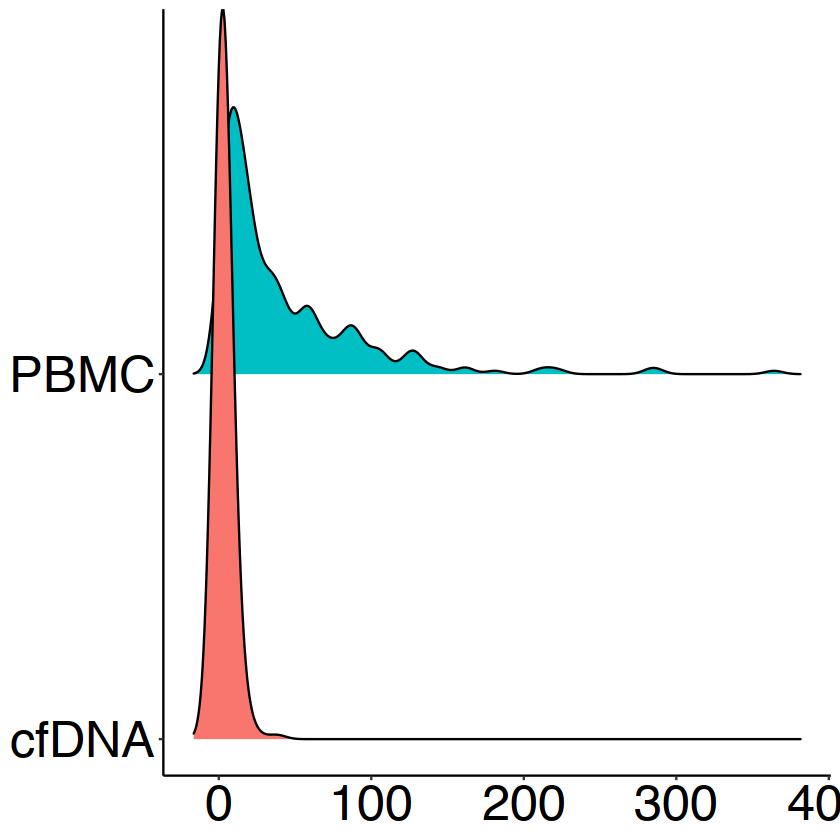

In [48]:
plot_ridge.fx(exp_len1[ exp_len1$Length == 13,], "Count", "sample_type")

## cfDNA

# V Usage

In [ ]:
pca_vusage.fx <- function(dta, sampleprocessingdta, sampletype, ell){
    
    #subset to PBMC samples
    dta_subset <- repFilter(dta, .method = "by.meta", .query = list(sample_type = include(sampletype)))
    
    dta_subset$meta <- cbind(dta_subset$meta, sampleprocessingdta[ match( dta_subset$meta$sample_id, 
                                                                  sampleprocessingdta$mysample_id),])
    dta_subset_gu <- as.data.frame(geneUsage(dta_subset$data, "hs.trbv", .norm = T, .quant = NA))
    rownames(dta_subset_gu) <- dta_subset_gu$Names
dta_subset_gu$Names <- NULL
    dta_subset_gu[is.na(dta_subset_gu)] <- 0
    res.pca <- prcomp(t(dta_subset_gu), scale. = TRUE, center = TRUE)
    p1 <- fviz_eig(res.pca)
    p2 <- fviz_pca_var(res.pca, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)
    groups <- as.factor(dta_subset$meta$libbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p3 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 1,alpha = 0.7,
                       col.ind = groups, 
                       addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                       title = "Library batch") + 
    theme(legend.position = "none") + scale_color_manual(values = myColors)
    
    groups <- as.factor(dta_subset$meta$capbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p4 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 1, alpha = 0.7,
                       col.ind = groups, 
                       addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                       title = "Capture batch") + 
    theme(legend.position = "none") + scale_color_manual(values = myColors)
    
    return(plot_grid(p1,p2,p3,p4))
}

# Diversity vs VJ

In [187]:
pbmc <- repFilter(int_load, .method = "by.meta", .query = list(sample_type = include("PBMC")))

In [206]:
int_load <- repFilter(int_load, .method = "by.meta", .query = list(group = exclude(NA)))

In [208]:
int_load <- repFilter(int_load, .method = "by.meta", .query = list(TRB = morethan(27)))

In [207]:
summary(int_load$meta$TRB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.0    27.0   130.6   128.0  2237.0 

check ambig = exc. and how it works

In [209]:
pbmc_vu <- as.data.frame(geneUsage(int_load$data, c("hs.trbv"), .norm = T, .quant = NA))

In [210]:
rownames(pbmc_vu) <- pbmc_vu$Names

pbmc_vu$Names <- NULL

In [211]:
pbmc_ju <- as.data.frame(geneUsage(int_load$data, "HomoSapiens.TRBJ", .norm = T, .quant = NA))

In [212]:
rownames(pbmc_ju) <- pbmc_ju$Names

pbmc_ju$Names <- NULL

In [213]:
mypbmc <- as.data.frame(t(pbmc_vu))

In [214]:
mypbmc <- cbind(mypbmc, as.data.frame(t(pbmc_ju)))

In [215]:
mypbmc[is.na(mypbmc)] <- 0

In [216]:
library(Rtsne)

In [218]:
tsne_out <- Rtsne(as.matrix(mypbmc))

In [219]:
tsne_df <- as.data.frame(tsne_out$Y)

In [221]:
tsne_df_meta <- cbind(tsne_df, int_load$meta)

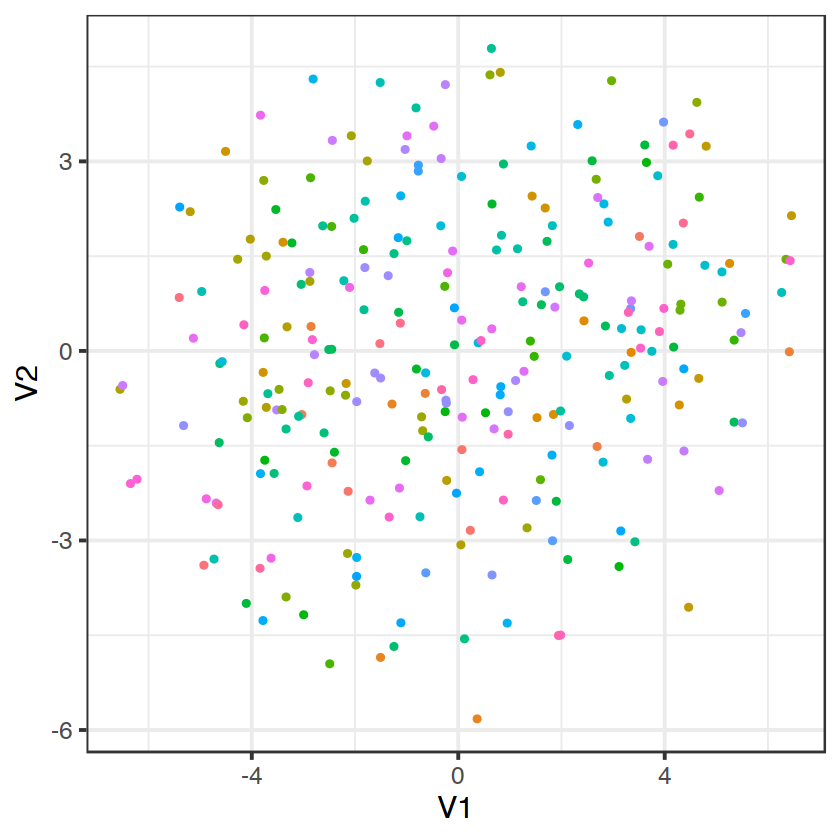

In [226]:
ggplot(data = tsne_df_meta,aes(x = V1, y = V2,color = Patient.x))+
  geom_point()+
  theme(legend.position="none")

In [56]:
res.pca <- prcomp(mypbmc, scale. = TRUE, center = TRUE)

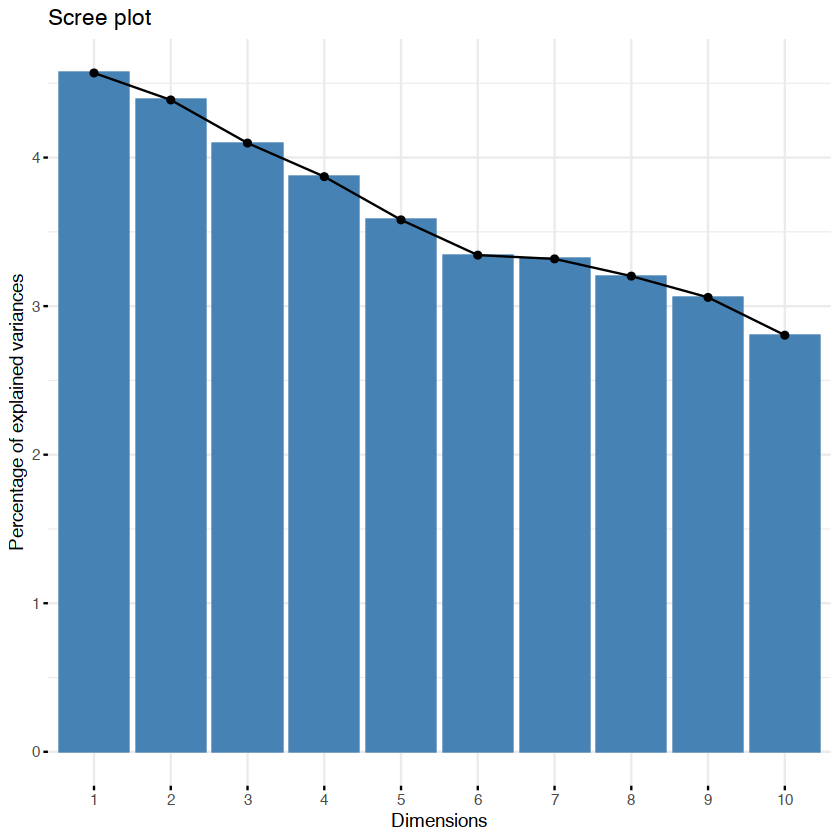

In [57]:
fviz_eig(res.pca)

Warning message:
“ggrepel: 52 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


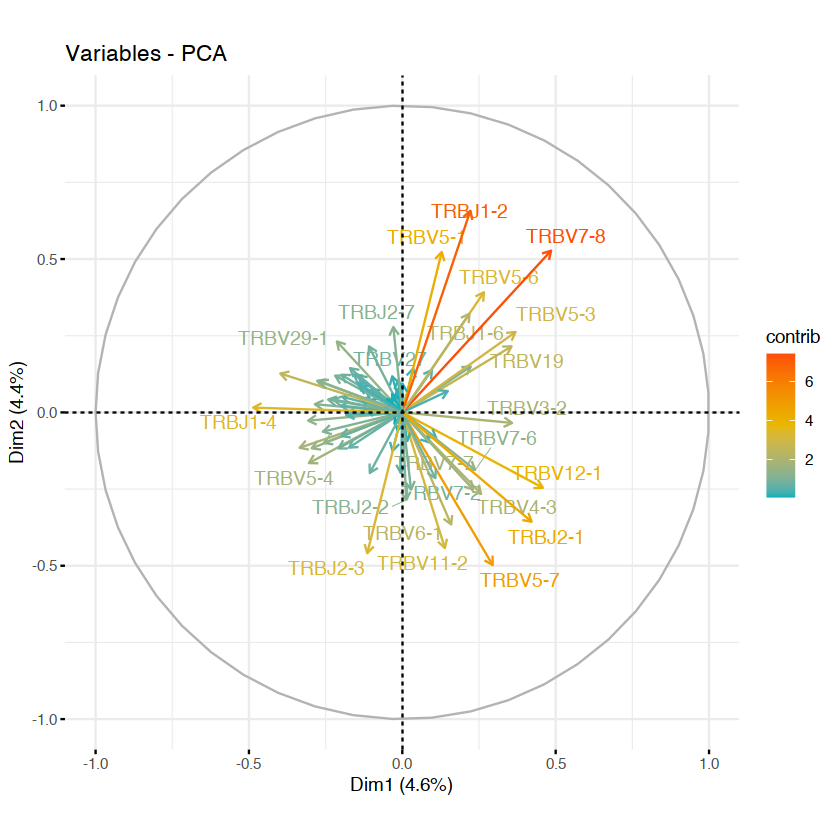

In [58]:
fviz_pca_var(res.pca, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [70]:
    groups <- as.factor(pbmc$meta$Disease_type)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p3 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 1, alpha = 0.7,
                       col.ind = groups, 
                       addEllipses = T, ellipse.alpha = 0, #invisible="quali",
                       title = "Library batch")  +scale_color_manual(values = myColors)
    #theme(legend.position = "none") + 

Too few points to calculate an ellipse

Too few points to calculate an ellipse



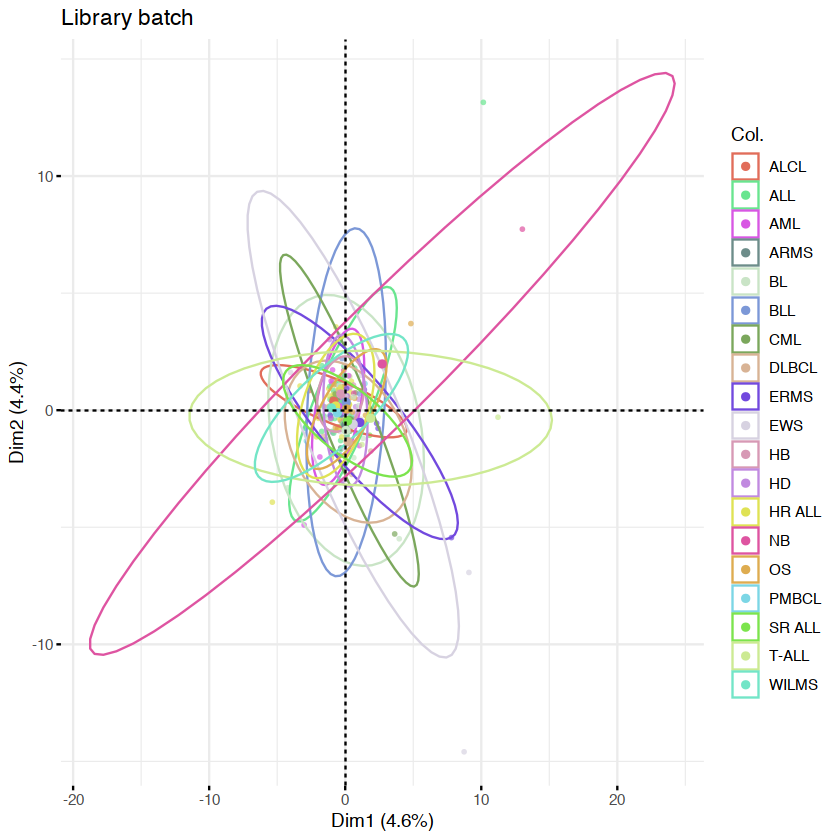

In [71]:
p3

In [ ]:
    dta_subset_gu[is.na(dta_subset_gu)] <- 0
    res.pca <- prcomp(t(dta_subset_gu), scale. = TRUE, center = TRUE)
    p1 <- fviz_eig(res.pca)
    p2 <- fviz_pca_var(res.pca, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)
    groups <- as.factor(dta_subset$meta$libbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p3 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 1,alpha = 0.7,
                       col.ind = groups, 
                       addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                       title = "Library batch") + 
    theme(legend.position = "none") + scale_color_manual(values = myColors)

In [42]:
dim(mypbmc)

[1] 284  77

In [39]:
tail(mypbmc)

,TRBV1,TRBV10-1,TRBV10-2,TRBV10-3,TRBV11-1,TRBV11-2,TRBV11-3,TRBV12-1,TRBV12-2,TRBV12-3,⋯,TRBV7-1,TRBV7-2,TRBV7-3,TRBV7-4,TRBV7-5,TRBV7-6,TRBV7-7,TRBV7-8,TRBV7-9,TRBV9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LFS_TCR-4759-PBMC-DNA,NA,0.004651163,0.004651163,0.02790698,0.004651163,0.032558140,0.009302326,NA,NA,0.01860465,⋯,NA,0.009302326,0.013953488,NA,NA,0.027906977,0.004651163,0.009302326,0.01860465,0.03255814
LFS_TCR-4783-PBMC-DNA,NA,NA,NA,0.02631579,0.013157895,0.013157895,NA,NA,NA,0.07894737,⋯,NA,0.052631579,0.026315789,NA,NA,0.013157895,NA,NA,0.03947368,0.03947368
LFS_TCR-4837-PBMC-DNA,0.004098361,0.028688525,0.012295082,0.01639344,0.004098361,0.012295082,0.012295082,NA,0.012295082,0.02049180,⋯,NA,0.024590164,NA,NA,NA,0.008196721,0.008196721,0.008196721,0.03688525,0.02049180
LFS_TCR-4838-PBMC-DNA,NA,0.005747126,0.005747126,0.01724138,0.011494253,0.034482759,0.017241379,0.005747126,NA,0.01724138,⋯,NA,0.022988506,NA,NA,NA,0.022988506,0.011494253,0.011494253,0.02873563,0.04022989
LFS_TCR-5014-PBMC-DNA,NA,0.010471204,NA,0.02094241,NA,0.005235602,NA,0.005235602,0.005235602,0.03664921,⋯,NA,0.036649215,0.036649215,NA,NA,NA,0.010471204,0.010471204,0.03664921,0.03141361
LFS_TCR-5067-PBMC-DNA,0.003937008,0.011811024,0.007874016,0.02755906,0.007874016,0.027559055,0.003937008,NA,NA,0.04724409,⋯,NA,0.015748031,0.007874016,NA,NA,0.015748031,NA,0.019685039,0.05118110,0.03543307


In [22]:
normals <- pbmc$sample_id[grepl("YO", pbmc$sample_id) | 
                grepl("MO", pbmc$sample_id)]

In [23]:
normals

NULL

In [24]:
pbmc <- pbmc[ !pbmc$sample_id %in% normals,]

ERROR: Error in pbmc[!pbmc$sample_id %in% normals, ]: incorrect number of dimensions


In [25]:
pbmc[ pbmc$sample_id %in% morethan400,]

ERROR: Error in pbmc[pbmc$sample_id %in% morethan400, ]: incorrect number of dimensions


In [66]:
summary(pbmc$q0_aa)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    56.5   141.5   248.7   348.8  2218.0 

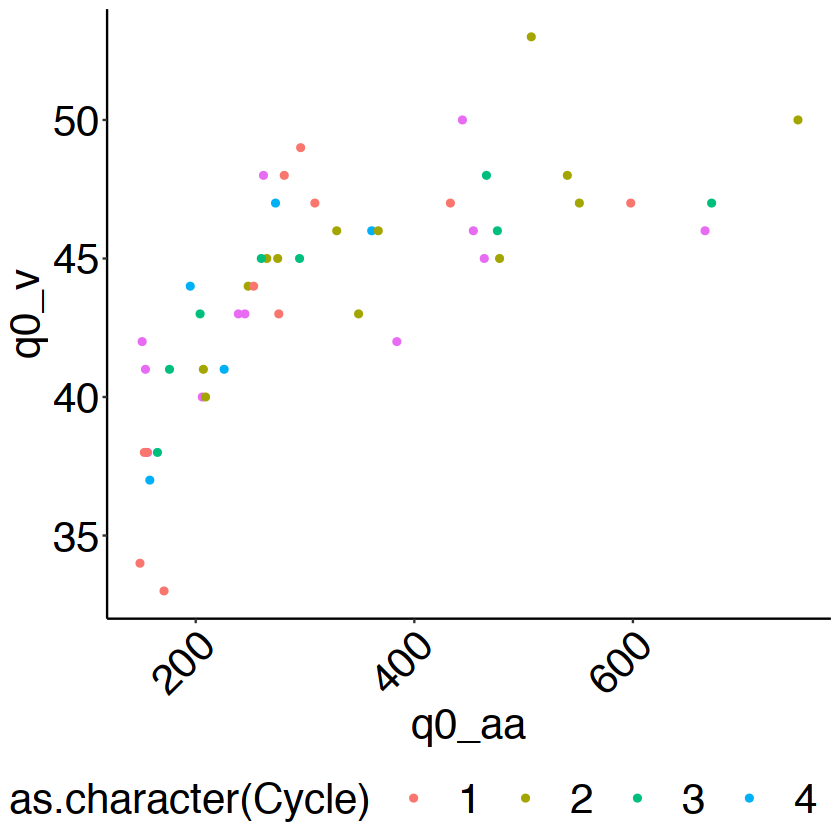

In [74]:
ggplot(data = pbmc[pbmc$sample_id %in% morethan400 &
                   pbmc$q0_aa >= 141,], 
       aes( x = q0_aa, y = q0_v, color = as.character(Cycle)) ) + geom_point() + 
myplot + myaxis + theme(legend.position = "bottom")# + coord_cartesian( x = c(0,500))

In [113]:
divstats$Disease_type <- metadata$Disease_type[ match(divstats$sample_id,metadata$sample_id)]
divstats$cancergroup <- metadata$group[ match(divstats$sample_id,metadata$sample_id)]

In [115]:
pbmc <- divstats[ divstats$Sample == "PBMC",]
pbmc <- pbmc[ pbmc$Cycle %in% c(0,1),]

In [116]:
pbmc$sample_id

[1] "CHP_350_01"      "CHP_354_01"      "CHP_366_01"      "CHP_367_01"     
 [5] "CHP_372_01"      "CHP_375_01"      "CHP_346_01"      "CHP_349_01"     
 [9] "CHP_351_01"      "CHP_352_01"      "CHP_358_01"      "CHP_404_01"     
[13] "CHP_405_01"      "CHP_409_01"      "CHP_411_01"      "CHP_415_01"     
[17] "CHP_416_01"      "CHP_418_01"      "CHP_422_01"      "CHP_348_01"     
[21] "LFS_TCR_4535_00" "LFS_TCR_4570_00" "LFS_TCR_4602_00" "LFS_TCR_4758_00"
[25] "LFS_TCR_4759_00" "LFS_TCR_4783_00" "LFS_TCR_4837_00" "LFS_TCR_4838_00"
[29] "LFS_TCR_5014_00" "LFS_TCR_5067_00" "CHP_373_01"      "CHP_378_01"     
[33] "CHP_347_01"      "CHP_355_01"      "CHP_357_01"      "CHP_361_01"     
[37] "CHP_364_01"      "CHP_353_01"      "CHP_359_01"      "CHP_362_01"     
[41] "CHP_368_01"      "CHP_370_01"      "CHP_387_01"      "CHP_396_01"     
[45] "CHP_397_01"      "CHP_399_01"      "CHP_10YO_M_00"   "CHP_11YO_M_00"  
[49] "CHP_15YO_F_A_00" "CHP_15YO_F_B_00" "CHP_15YO_M_00"   "CHP_16YO_M_00"  
[53] "CHP_1YO_M_A_00"  "CHP_1YO_M_B_00"  "CHP_2YO_M_00"    "CHP_3YO_F_00"   
[57] "CHP_3YO_M_A_00"  "CHP_3YO_M_B_00"  "CHP_5YO_M_00"    "CHP_8MO_F_00"   
[61] "CHP_377_01"      "CHP_401_01"      "CHP_363_01"      "CHP_365_01"     
[65] "CHP_371_01"      "CHP_381_01"      "CHP_414_01"      "CHP_420_01"     
[69] "CHP_369_01"

In [118]:
# add lfs remove normal
pbmc$Disease_type[grepl("LFS", pbmc$sample_id)] <- "LFS"

pbmc <- pbmc[!grepl("YO", pbmc$sample_id),]
pbmc <- pbmc[!grepl("MO", pbmc$sample_id),]

In [124]:
myorder <- sort(tapply(pbmc$q1_vj, pbmc$Disease_type, median))

In [125]:
myorder

T-ALL     WILMS      ALCL        HB       CML        BL    HR ALL        NB 
 4.582472  7.771891  8.372553 11.241965 11.652155 11.893585 12.619961 14.685184 
       OS       LFS        HD       AML       ALL      ERMS      ARMS       EWS 
16.681415 17.315790 17.338981 18.090124 19.455056 20.030255 20.491174 20.641408

In [126]:
pbmc$Disease_type <- factor(pbmc$Disease_type, levels = names(myorder))

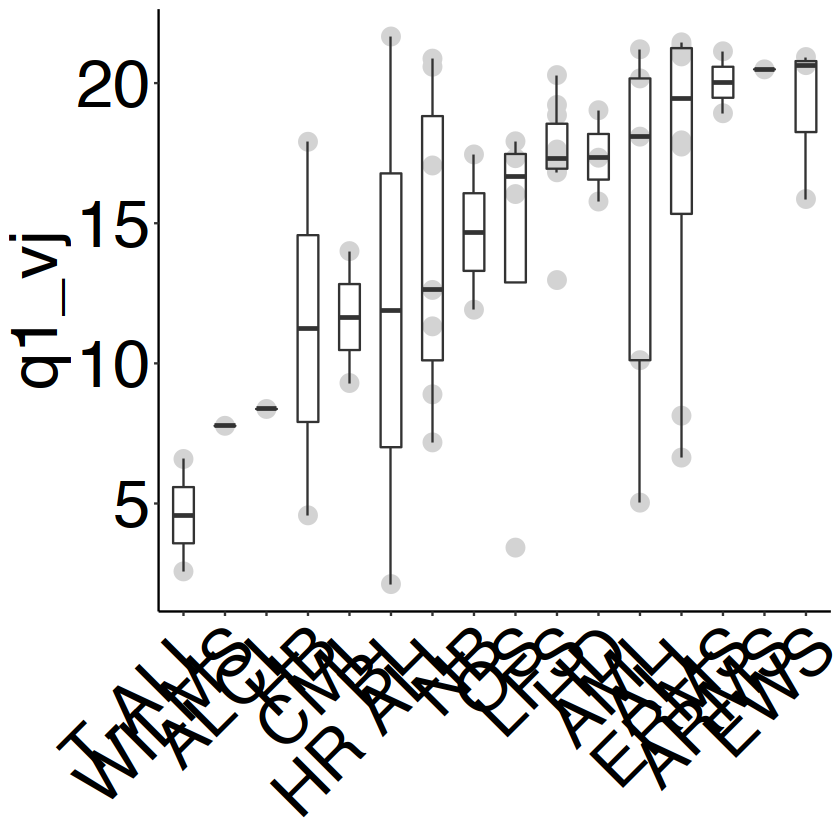

In [127]:
divplot_cohort <- ggplot(data = pbmc,
                 aes(x = Disease_type, y = q1_vj)) + 
geom_beeswarm(size = 5, color = "light grey", shape = 16, cex = 0.2) + 
geom_boxplot(width = 0.5, outlier.colour = NA, fill = NA) + 
myaxis + myplot +
scale_color_manual(values = cohort_col) +
theme(legend.position = "none", 
     axis.title.x = element_blank(),
     axis.title.y = element_text(size = 40),
     axis.text.x = element_text(size = 40),
      axis.text.y = element_text(size = 40),
     plot.title = element_text(size = 40, hjust = 0.5)) 
divplot_cohort

In [128]:
pdf(paste0(plotpath, "divplot_cohort_q1vj.pdf"),
   width = 20, height = 10)
divplot_cohort
dev.off()

pdf 
  2

In [19]:
head(int_load$meta)

Sample
<chr>
CLONES_TRBCHP_10YO-M_PBMC_DNA
CLONES_TRBCHP_11YO-M_PBMC_DNA
CLONES_TRBCHP_15YO-F-A_PBMC_DNA
CLONES_TRBCHP_15YO-F-B_PBMC_DNA
CLONES_TRBCHP_15YO-M_PBMC_DNA
CLONES_TRBCHP_16YO-M_PBMC_DNA


In [33]:
head(int_load$data)

Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,D.end,⋯,CDR2.nt,CDR2.aa,FR1.nt,FR1.aa,FR2.nt,FR2.aa,FR3.nt,FR3.aa,FR4.nt,FR4.aa
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
3012,0.2064427690,TGTGCCAGCAGCCAATATACGGCAGATACGCAGTATTTT,CASSQYTADTQYF,TRBV13*00(1003.5),NA,TRBJ2-3*00(124.7),12,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1590,0.1089787526,TGTGCCAGCAGTGATGGACGCTACGGGCGGGACAGTAACACTGAAGCTTTCTTT,CASSDGRYGRDSNTEAFF,TRBV2*00(574.1),TRBD1*00(40),TRBJ1-1*00(149.8),14,27,35,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1301,0.0891706648,TGTGCCAGCAGTTTAAACTCGGGCGGGACATATGGCTACACCTTC,CASSLNSGGTYGYTF,"TRBV12-4*00(334.8), TRBV12-3*00(334.3)","TRBD1*00(35), TRBD2*00(30)",TRBJ1-2*00(215),15,23,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1214,0.0832076765,TGTGCCAGCTACGAGGGGGAGTGGAACACTGAAGCTTTCTTT,CASYEGEWNTEAFF,TRBV2*00(229.3),TRBD1*00(30),TRBJ1-1*00(234.8),9,13,19,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1088,0.0745716244,TGTGCCAGCAGTTTAGGGCCGAACACTGAAGCTTTCTTT,CASSLGPNTEAFF,"TRBV12-4*00(755), TRBV12-3*00(753.3)",NA,TRBJ1-1*00(114.9),16,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
860,0.0589444825,TGTGCCAGTAGTAACGGCTCGGGGCGCCCTGAAGCTTTCTTT,CASSNGSGRPEAFF,TRBV19*00(737.1),TRBD1*00(40),TRBJ1-1*00(209.8),13,20,28,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
829,0.0568197395,TGTGCCAGCAGCCAAGTTCGTGGGGCAGGGGCCTATAATTCACCCCTCCACTTT,CASSQVRGAGAYNSPLHF,"TRBV3-1*00(411), TRBV3-2*00(396.1)",TRBD1*00(30),TRBJ1-6*00(256),23,25,31,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
805,0.0551747772,TGTGCCAGCAGCTCAGACCGAACAGGTCACGGCTACACCTTC,CASSSDRTGHGYTF,TRBV7-9*00(492.6),TRBD1*00(25),TRBJ1-2*00(204.2),13,21,26,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
627,0.0429746402,TGTGCCAGCAGTTTGTTCGGACCTCCCTACGAGCAGTACTTC,CASSLFGPPYEQYF,TRBV27*00(1269.8),NA,TRBJ2-7*00(130),14,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [106]:
for(i in 1:length(int_load$data)){
    int_load$data[[i]] <- as.data.frame(int_load$data[[i]])
    int_load$data[[i]][,"V.name"] <- gsub("\\(.*", "", int_load$data[[i]][,"V.name"])
    int_load$data[[i]] <- as_tibble(int_load$data[[i]])
}

In [134]:
imm_gu <- geneUsage(int_load$data, "hs.trbv")

In [135]:
imm_gu_js <- geneUsageAnalysis(as.data.frame(imm_gu), .method = "js")

  |======================================================================| 100%


In [136]:
imm_gu_cor <- geneUsageAnalysis(as.data.frame(imm_gu), .method = "cor")

  |                                                                      |   0%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |                                                                      |   1%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=                                                                     |   1%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=                                                                     |   2%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==                                                                    |   2%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==                                                                    |   3%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==                                                                    |   4%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===                                                                   |   4%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===                                                                   |   5%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====                                                                  |   5%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====                                                                  |   6%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====                                                                 |   6%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=====                                                                 |   7%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====                                                                 |   8%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======                                                                |   8%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======                                                                |   9%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======                                                               |   9%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=======                                                               |  10%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======                                                               |  11%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |========                                                              |  11%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |========                                                              |  12%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========                                                             |  12%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=========                                                             |  13%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========                                                             |  14%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==========                                                            |  14%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========                                                            |  15%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===========                                                           |  15%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===========                                                           |  16%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============                                                          |  16%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |============                                                          |  17%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============                                                          |  18%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=============                                                         |  18%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=============                                                         |  19%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============                                                        |  19%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==============                                                        |  20%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============                                                        |  21%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===============                                                       |  21%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===============                                                       |  22%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================                                                      |  22%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================                                                      |  23%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================                                                      |  24%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=================                                                     |  24%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=================                                                     |  25%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==================                                                    |  25%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==================                                                    |  26%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================                                                   |  26%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===================                                                   |  27%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================                                                   |  28%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====================                                                  |  28%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====================                                                  |  29%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====================                                                 |  29%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=====================                                                 |  30%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====================                                                 |  31%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |======================                                                |  31%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======================                                                |  32%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======================                                               |  32%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=======================                                               |  33%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======================                                               |  34%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |========================                                              |  34%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |========================                                              |  35%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========================                                             |  35%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========================                                             |  36%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================                                            |  36%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==========================                                            |  37%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================                                            |  38%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===========================                                           |  38%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===========================                                           |  39%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================                                          |  39%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |============================                                          |  40%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================                                          |  41%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=============================                                         |  41%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=============================                                         |  42%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================                                        |  42%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================                                        |  43%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================                                        |  44%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===============================                                       |  44%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===============================                                       |  45%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================================                                      |  45%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================================                                      |  46%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=================================                                     |  46%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=================================                                     |  47%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=================================                                     |  48%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==================================                                    |  48%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==================================                                    |  49%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================================                                   |  49%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===================================                                   |  50%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================================                                   |  51%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |====================================                                  |  51%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====================================                                  |  52%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====================================                                 |  52%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=====================================                                 |  53%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====================================                                 |  54%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |======================================                                |  54%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======================================                                |  55%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======================================                               |  55%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======================================                               |  56%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |========================================                              |  56%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |========================================                              |  57%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |========================================                              |  58%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========================================                             |  58%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========================================                             |  59%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================================                            |  59%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==========================================                            |  60%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================================                            |  61%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===========================================                           |  61%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===========================================                           |  62%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================================                          |  62%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================================                          |  63%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================================                          |  64%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=============================================                         |  64%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=============================================                         |  65%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================================                        |  65%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================================                        |  66%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===============================================                       |  66%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===============================================                       |  67%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===============================================                       |  68%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================================================                      |  68%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================================================                      |  69%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=================================================                     |  69%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=================================================                     |  70%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=================================================                     |  71%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==================================================                    |  71%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==================================================                    |  72%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================================================                   |  72%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================================================                   |  73%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================================================                   |  74%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |====================================================                  |  74%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====================================================                  |  75%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====================================================                 |  75%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=====================================================                 |  76%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======================================================                |  76%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |======================================================                |  77%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======================================================                |  78%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======================================================               |  78%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=======================================================               |  79%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |========================================================              |  79%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |========================================================              |  80%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |========================================================              |  81%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=========================================================             |  81%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=========================================================             |  82%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================================================            |  82%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================================================            |  83%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==========================================================            |  84%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===========================================================           |  84%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===========================================================           |  85%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================================================          |  85%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |============================================================          |  86%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=============================================================         |  86%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=============================================================         |  87%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=============================================================         |  88%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================================================        |  88%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==============================================================        |  89%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===============================================================       |  89%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===============================================================       |  90%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===============================================================       |  91%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |================================================================      |  91%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |================================================================      |  92%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=================================================================     |  92%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |=================================================================     |  93%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |=================================================================     |  94%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |==================================================================    |  94%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |==================================================================    |  95%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===================================================================   |  95%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===================================================================   |  96%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====================================================================  |  96%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |====================================================================  |  97%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |====================================================================  |  98%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |===================================================================== |  98%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |===================================================================== |  99%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

  |======================================================================|  99%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”


  |======================================================================| 100%

Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[[j]], ...):
“the standard deviation is zero”
Warning message in .fun(.datalist[[i]], .datalist[

In [139]:
head(imm_gu_cor[, c("CLONES_TRBCHP_11YO-M_PBMC_DNA", "CLONES_TRBCHP_15YO-F-B_PBMC_DNA")])

,CLONES_TRBCHP_11YO-M_PBMC_DNA,CLONES_TRBCHP_15YO-F-B_PBMC_DNA
CLONES_TRBCHP_10YO-M_PBMC_DNA,0.201761340,-0.01078432
CLONES_TRBCHP_11YO-M_PBMC_DNA,NA,-0.15500932
CLONES_TRBCHP_15YO-F-A_PBMC_DNA,0.396358551,0.09152131
CLONES_TRBCHP_15YO-F-B_PBMC_DNA,-0.155009321,NA
CLONES_TRBCHP_15YO-M_PBMC_DNA,0.323197360,0.03032755
CLONES_TRBCHP_16YO-M_PBMC_DNA,-0.003565793,0.32121578


In [138]:
head(imm_gu_cor[, c("CLONES_TRBCHP_11YO-M_PBMC_DNA", "CLONES_TRBCHP_15YO-F-B_PBMC_DNA")])

,CLONES_TRBCHP_11YO-M_PBMC_DNA,CLONES_TRBCHP_15YO-F-B_PBMC_DNA
CLONES_TRBCHP_10YO-M_PBMC_DNA,0.6526249,0.8357194
CLONES_TRBCHP_11YO-M_PBMC_DNA,NA,1.0000000
CLONES_TRBCHP_15YO-F-A_PBMC_DNA,0.6345714,0.7746309
CLONES_TRBCHP_15YO-F-B_PBMC_DNA,1.0000000,NA
CLONES_TRBCHP_15YO-M_PBMC_DNA,0.5601872,0.8170243
CLONES_TRBCHP_16YO-M_PBMC_DNA,0.8871987,0.6284906


In [131]:
imm_gu_js

,CLONES_TRBCHP_11YO-M_PBMC_DNA,CLONES_TRBCHP_15YO-F-A_PBMC_DNA,CLONES_TRBCHP_15YO-F-B_PBMC_DNA,CLONES_TRBCHP_15YO-M_PBMC_DNA,CLONES_TRBCHP_16YO-M_PBMC_DNA,CLONES_TRBCHP_1YO-M-A_PBMC_DNA,CLONES_TRBCHP_1YO-M-B_PBMC_DNA,CLONES_TRBCHP_2YO-M_PBMC_DNA,CLONES_TRBCHP_303-05-PBMC-DNA,CLONES_TRBCHP_315-05_cfDNA,⋯,CLONES_TRBLFS_TCR-4535-PBMC-DNA,CLONES_TRBLFS_TCR-4570-PBMC-DNA,CLONES_TRBLFS_TCR-4602-PBMC-DNA,CLONES_TRBLFS_TCR-4758-PBMC-DNA,CLONES_TRBLFS_TCR-4759-PBMC-DNA,CLONES_TRBLFS_TCR-4783-PBMC-DNA,CLONES_TRBLFS_TCR-4837-PBMC-DNA,CLONES_TRBLFS_TCR-4838-PBMC-DNA,CLONES_TRBLFS_TCR-5014-PBMC-DNA,CLONES_TRBLFS_TCR-5067-PBMC-DNA
CLONES_TRBCHP_11YO-M_PBMC_DNA,NA,0.6345714,1.0000000,0.5601872,0.8871987,0.5129018,0.8062737,0.6764124,0.4944026,0.7169172,⋯,0.3998525,0.48513767,0.4201168,0.48842124,0.5359021,0.5558218,0.5277017,0.4919884,0.4486422,0.46460858
CLONES_TRBCHP_15YO-F-A_PBMC_DNA,0.6345714,NA,0.7746309,0.4560547,0.8573908,0.5108705,0.5229848,0.5818878,0.5585169,0.7742817,⋯,0.4724939,0.53963895,0.4173142,0.47918442,0.4815817,0.5988653,0.4893944,0.4218899,0.4874251,0.45073528
CLONES_TRBCHP_15YO-F-B_PBMC_DNA,1.0000000,0.7746309,NA,0.8170243,0.6284906,0.7980925,1.0000000,0.6439407,0.6770022,1.0000000,⋯,0.7441825,0.71217624,0.7448008,0.61498413,0.6814998,0.8020612,0.5966586,0.7359344,0.6627400,0.65128719
CLONES_TRBCHP_15YO-M_PBMC_DNA,0.5601872,0.4560547,0.8170243,NA,0.8223909,0.3719532,0.9027926,0.7502139,0.3584383,1.0000000,⋯,0.4559983,0.43803071,0.3579994,0.44780656,0.4113716,0.4861621,0.3274325,0.3830514,0.3653118,0.36283985
CLONES_TRBCHP_16YO-M_PBMC_DNA,0.8871987,0.8573908,0.6284906,0.8223909,NA,0.8901305,1.0000000,0.6979078,0.7178893,1.0000000,⋯,0.7848315,0.71890134,0.8456544,0.73727914,0.6648671,0.7362522,0.7158131,0.7427576,0.7021059,0.73835123
CLONES_TRBCHP_1YO-M-A_PBMC_DNA,0.5129018,0.5108705,0.7980925,0.3719532,0.8901305,NA,0.7871230,0.5550439,0.3389720,1.0000000,⋯,0.3372391,0.27704830,0.2326967,0.30791906,0.3038342,0.4219421,0.2387160,0.2602440,0.2380738,0.30519760
CLONES_TRBCHP_1YO-M-B_PBMC_DNA,0.8062737,0.5229848,1.0000000,0.9027926,1.0000000,0.7871230,NA,1.0000000,0.8749453,0.4591479,⋯,0.8244003,0.82035980,0.7681021,0.81393647,0.8381913,0.8953338,0.8698020,0.7390355,0.8579679,0.79888532
CLONES_TRBCHP_2YO-M_PBMC_DNA,0.6764124,0.5818878,0.6439407,0.7502139,0.6979078,0.5550439,1.0000000,NA,0.5276380,1.0000000,⋯,0.4086678,0.43382751,0.4703070,0.51320954,0.4976916,0.5810903,0.4874182,0.4854569,0.4249404,0.54535984
CLONES_TRBCHP_303-05-PBMC-DNA,0.4944026,0.5585169,0.6770022,0.3584383,0.7178893,0.3389720,0.8749453,0.5276380,NA,0.9067178,⋯,0.1422085,0.10820191,0.1497740,0.10711990,0.1330777,0.2162205,0.1194602,0.1431371,0.1321434,0.08355296
CLONES_TRBCHP_315-05_cfDNA,0.7169172,0.7742817,1.0000000,1.0000000,1.0000000,1.0000000,0.4591479,1.0000000,0.9067178,NA,⋯,0.8915237,0.90624290,0.8868939,0.89377720,0.9738230,0.9332328,0.9447728,0.8285354,0.9262311,0.90439259


Add metadata

In [10]:
int_load$meta <- divstats

In [11]:
head(int_load$meta)

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,⋯,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,Sample,Group,Patient,Cycle,sample_id
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
CHP_315-05-PBMC-DNA,25,192,130.20833,7.680000,1.6157205,63,4,2,27.519,0.992,⋯,14.196,1.262,7.130,7.367,1.066,PBMC,CHP,CHP_315,5,CHP_315_05
CHP_350-01-PBMC-DNA,153,1647,92.89617,10.764706,0.7872963,59,5,6,154.893,1.000,⋯,125.659,2.217,94.691,100.406,3.380,PBMC,CHP,CHP_350,1,CHP_350_01
CHP_350-02-PBMC-DNA,269,2992,89.90642,11.122677,0.8300771,92,17,5,281.850,0.997,⋯,219.073,2.893,159.505,168.431,5.344,PBMC,CHP,CHP_350,2,CHP_350_02
CHP_350-03-PBMC-DNA,207,2134,97.00094,10.309179,0.7807083,52,9,10,210.609,1.000,⋯,167.953,2.495,128.847,137.062,3.637,PBMC,CHP,CHP_350,3,CHP_350_03
CHP_350-04-PBMC-DNA,106,989,107.17897,9.330189,0.7731222,34,10,2,114.239,0.993,⋯,86.422,2.107,66.580,71.313,2.531,PBMC,CHP,CHP_350,4,CHP_350_04
CHP_353-02-PBMC-DNA,16,234,68.37607,14.625000,0.5897147,35,1,0,16.000,1.000,⋯,13.807,0.473,12.066,12.668,0.744,PBMC,CHP,CHP_353,2,CHP_353_02


In [15]:
int_load$meta[,"Sample1"] <- gsub("CLONES_TRB","",int_load$meta[,"Sample"])

In [20]:
library(tibble)

In [23]:
typeof(int_load)

[1] "list"

In [24]:
head(int_load$meta)

Sample                         
1 CLONES_TRBCHP_10YO-M_PBMC_DNA  
2 CLONES_TRBCHP_11YO-M_PBMC_DNA  
3 CLONES_TRBCHP_15YO-F-A_PBMC_DNA
4 CLONES_TRBCHP_15YO-F-B_PBMC_DNA
5 CLONES_TRBCHP_15YO-M_PBMC_DNA  
6 CLONES_TRBCHP_16YO-M_PBMC_DNA  
  Sample1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [21]:
int_load$meta %>% add_column(z = -1:1, w = 0)

ERROR: Error: New columns must be compatible with `.data`.
[31m✖[39m New columns have 3 rows.
[34mℹ[39m `.data` has 589 rows.


In [15]:
imm_ov1 <- repOverlap(int_load$data, .method = "public", .verbose = F)

In [17]:
#imm_ov2 <- repOverlap(int_load$data, .method = "morisita", .verbose = F)

In [23]:
imm_ov1[is.na(imm_ov1)] = 0

hm <- repOverlapAnalysis(imm_ov1, "mds") 

ERROR: Error in MASS::isoMDS(.data, k = 2, trace = FALSE): zero or negative distance between objects 1 and 2


In [9]:
ls()

[1] "age_pal"      "cluster_col"  "cogpal"       "cohort_col"   "cri_col"     
 [6] "datapath"     "divstats"     "gender_pal"   "gitpath"      "group_col"   
[11] "histp"        "int_load"     "manifestpath" "metadata"     "myaxis"      
[16] "mycnpal"      "myplot"       "plotpath"     "race_pal"

In [14]:
head(int_load$data)

Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,D.end,⋯,CDR2.nt,CDR2.aa,FR1.nt,FR1.aa,FR2.nt,FR2.aa,FR3.nt,FR3.aa,FR4.nt,FR4.aa
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
3012,0.2064427690,TGTGCCAGCAGCCAATATACGGCAGATACGCAGTATTTT,CASSQYTADTQYF,TRBV13*00(1003.5),NA,TRBJ2-3*00(124.7),12,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1590,0.1089787526,TGTGCCAGCAGTGATGGACGCTACGGGCGGGACAGTAACACTGAAGCTTTCTTT,CASSDGRYGRDSNTEAFF,TRBV2*00(574.1),TRBD1*00(40),TRBJ1-1*00(149.8),14,27,35,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1301,0.0891706648,TGTGCCAGCAGTTTAAACTCGGGCGGGACATATGGCTACACCTTC,CASSLNSGGTYGYTF,"TRBV12-4*00(334.8), TRBV12-3*00(334.3)","TRBD1*00(35), TRBD2*00(30)",TRBJ1-2*00(215),15,23,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1214,0.0832076765,TGTGCCAGCTACGAGGGGGAGTGGAACACTGAAGCTTTCTTT,CASYEGEWNTEAFF,TRBV2*00(229.3),TRBD1*00(30),TRBJ1-1*00(234.8),9,13,19,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1088,0.0745716244,TGTGCCAGCAGTTTAGGGCCGAACACTGAAGCTTTCTTT,CASSLGPNTEAFF,"TRBV12-4*00(755), TRBV12-3*00(753.3)",NA,TRBJ1-1*00(114.9),16,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
860,0.0589444825,TGTGCCAGTAGTAACGGCTCGGGGCGCCCTGAAGCTTTCTTT,CASSNGSGRPEAFF,TRBV19*00(737.1),TRBD1*00(40),TRBJ1-1*00(209.8),13,20,28,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
829,0.0568197395,TGTGCCAGCAGCCAAGTTCGTGGGGCAGGGGCCTATAATTCACCCCTCCACTTT,CASSQVRGAGAYNSPLHF,"TRBV3-1*00(411), TRBV3-2*00(396.1)",TRBD1*00(30),TRBJ1-6*00(256),23,25,31,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
805,0.0551747772,TGTGCCAGCAGCTCAGACCGAACAGGTCACGGCTACACCTTC,CASSSDRTGHGYTF,TRBV7-9*00(492.6),TRBD1*00(25),TRBJ1-2*00(204.2),13,21,26,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
627,0.0429746402,TGTGCCAGCAGTTTGTTCGGACCTCCCTACGAGCAGTACTTC,CASSLFGPPYEQYF,TRBV27*00(1269.8),NA,TRBJ2-7*00(130),14,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
